<a href="https://colab.research.google.com/github/imams12/Machine_Learning_Essential/blob/main/Machine_Learning_Essential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Essential




## Package Introduction

Basic Package for DS is Pandas, Sklearn, Numpy, Matplotlib or Seaborn. Also, Basic Function definition

In [ ]:
## Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Connecting to data
from google.colab import files
import io
import time

## Save model
import joblib

## Stating the Problem and Importing Data

Problem Statement : Predict the customer churn

source : https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction/data

In [ ]:
## Get The Data
PATH_DATA = 'sample_data/'
dta = pd.read_csv(PATH_DATA + 'customer churn telco - WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
dta.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dta['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
dta.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
len(dta.customerID.unique()) == len(dta.customerID) ## --> the customer is unique

True

In [ ]:
dta.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Data Preparation 

It will consist the Simple EDA and Feature Eng

In [ ]:
def plot_compare(mydata,col_target,col_x):
    d1=mydata[mydata[col_target]==1][col_x]
    d2=mydata[mydata[col_target]==0][col_x]
    plt.figure(figsize=(7.5,7.5))
    sns.distplot(d1,label='Churn')
    sns.distplot(d2,label='Not Churn')
    plt.legend(loc='upper left')

In [ ]:
def fun(x,y):
  z = x**y
  return z

In [ ]:
fun(4,5)

1024

### Devide the columns type

In [ ]:
dta.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# []
# {}
# ()

In [ ]:
# col_cat=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
#          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
# col_num=['tenure','MonthlyCharges','TotalCharges']

col_cat=['gender','SeniorCitizen','Partner']
col_num=['MonthlyCharges','TotalCharges']


In [ ]:
## Change target into numerical target
dta['actual_churn']=(dta['Churn']=='Yes').astype(int)
target=['actual_churn']

In [ ]:
dta.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,actual_churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


### Simple and Quick EDA

In [ ]:
dta.shape

(7043, 22)

In [ ]:
## Calculate the churn Fraction
# dta[target].mean()
target_count = dta[target].value_counts()
target_count/target_count.sum()

actual_churn
0               0.73463
1               0.26537
dtype: float64

Check For `Null` and outliers

In [ ]:
dta.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
actual_churn         0
dtype: int64

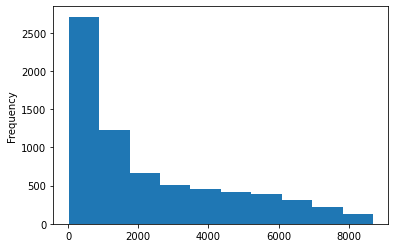

In [ ]:
dta['TotalCharges'].plot(kind='hist')

imputation could be done by many ways. In this case, `TotalCharges` can be imputed by check the package the customer used. But, because its only 11 out of 7K customer, we can use median instead.

In [ ]:
dta['TotalCharges']=dta['TotalCharges'].fillna(dta['TotalCharges'].median()) ## --> impute missing Value

In [ ]:
# dta['tenure'].plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


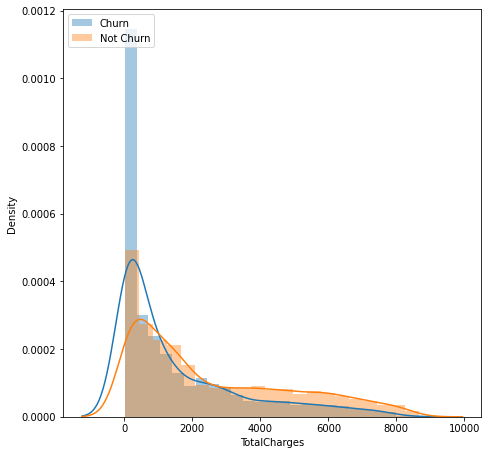

In [ ]:
## Numeric
plot_compare(dta,'actual_churn','TotalCharges')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


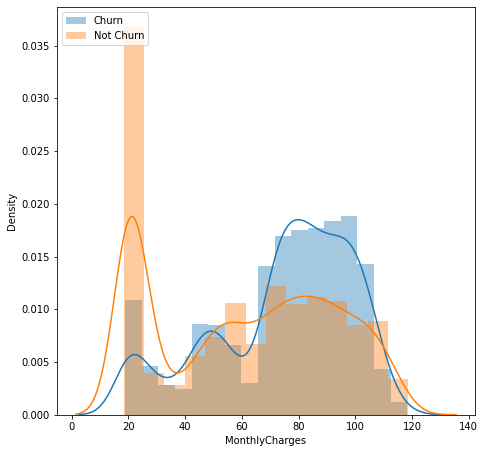

In [ ]:
plot_compare(dta,'actual_churn','MonthlyCharges')

In [ ]:
# plt.figure(figsize=(7.5,7.5))
# sns.scatterplot(y='MonthlyCharges',x='tenure',data=dta,hue=target[0])

In [ ]:
# plt.figure(figsize=(7.5,7.5))
# sns.scatterplot(y='TotalCharges',x='tenure',data=dta,hue=target[0])

In [ ]:
col_cat

['gender', 'SeniorCitizen', 'Partner']

In [ ]:
## Categorical
## Use ANOVA or Chi-Square Test
dta.groupby('gender').agg({target[0]:[np.mean,np.std,np.size]})

actual_churn                
               mean       std  size
gender                             
Female     0.269209  0.443612  3488
Male       0.261603  0.439570  3555

In [ ]:
dta.groupby('SeniorCitizen').agg({target[0]:[np.mean,np.std,np.size]})


actual_churn                
                      mean       std  size
SeniorCitizen                             
0                 0.236062  0.424697  5901
1                 0.416813  0.493247  1142

In [ ]:
dta.groupby('Partner').agg({target[0]:[np.mean,np.std,np.size]})


actual_churn                
                mean       std  size
Partner                             
No          0.329580  0.470125  3641
Yes         0.196649  0.397523  3402

### Feature engineering

In [ ]:
## Categorical Handling
# One Hot, Dummy, Hashing

onehot=OneHotEncoder()
onehot.fit(dta[col_cat])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
# [1,2,1,3,2,1] --> [[1,0,0],
                  #  [0,1,0],
                  #  [1,0,0],
                  #  [0,0,1],
                  #  [0,1,0],
                  #  [1,0,0]]


# [1,2,1,3,2,1] --> [[1,0],
                   # [0,1],
                   # [1,0],
                   # [0,0],
                   # [0,1],
                   # [1,0]]



In [ ]:
col_cat2=[]
for i,j in zip(col_cat,onehot.categories_):
  for e in j:
    col_cat2.append(str(i)+"_"+str(e))

In [ ]:
dta[col_cat2]=pd.DataFrame(onehot.transform(dta[col_cat]).toarray())

In [ ]:
# dta.head()
dta[col_cat2].head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes
0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
dta[col_num].sample(10)

,MonthlyCharges,TotalCharges
6512,60.90,688.50
5790,50.85,2036.55
6969,20.50,20.50
1915,51.10,1269.60
5262,68.70,4070.95
6782,51.10,531.15
6839,100.75,1129.75
4528,88.15,3973.20
4913,76.10,1054.80
967,20.85,60.65


In [ ]:
## Numerical Handling
# Standardized, Caping.. Remember, the real data should have the same standarization or any transformation

SS=StandardScaler()
SS.fit(dta[col_num])

col_num2=[c+"_SS" for c in col_num]
dta[col_num2]=pd.DataFrame(SS.transform(dta[col_num]))

In [ ]:
joblib.dump(SS,'sample_data/standardS_churnv1.pkl')

['sample_data/standardS_churnv1.pkl']

In [ ]:
dta[col_num2].sample(5)

,MonthlyCharges_SS,TotalCharges_SS
3876,1.192782,0.059173
5278,1.490243,1.620709
2229,0.190718,-0.877537
2329,0.995028,1.407011
199,-1.462770,-0.998259


In [ ]:
## Or Generates New Features
dta['log_TotalCharges']=np.log(dta['TotalCharges'])
# dta['sqrt_tenure']= square root of tenure
# dta['charge_per_tenure']= total charge per (tenure + 1)

# col_transform=['log_TotalCharges','sqrt_tenure','charge_per_tenure']
col_transform=['log_TotalCharges']

In [ ]:
col_cat2,col_num2,col_transform

(['gender_Female',
  'gender_Male',
  'SeniorCitizen_0',
  'SeniorCitizen_1',
  'Partner_No',
  'Partner_Yes'],
 ['MonthlyCharges_SS', 'TotalCharges_SS'],
 ['log_TotalCharges'])

In [ ]:
## Then Explore it again... if necessary
corr_values=dta[col_cat2+col_num2+col_transform+target].corr()[target[0]].abs().sort_values()
corr_values

gender_Female        0.008612
gender_Male          0.008612
Partner_Yes          0.150448
Partner_No           0.150448
SeniorCitizen_0      0.150889
SeniorCitizen_1      0.150889
MonthlyCharges_SS    0.193356
TotalCharges_SS      0.199037
log_TotalCharges     0.241869
actual_churn         1.000000
Name: actual_churn, dtype: float64

In [ ]:
corr_values[corr_values>0.15].index.tolist()

['Partner_Yes',
 'Partner_No',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'MonthlyCharges_SS',
 'TotalCharges_SS',
 'log_TotalCharges',
 'actual_churn']

In [ ]:
## Summarize all the columns that will be used
col_used=corr_values[corr_values>0.15].index.tolist()
col_used.sort()
col_used.remove(target[0])

# or
# col_used=col_cat2+col_num2+col_transform
col_used

['MonthlyCharges_SS',
 'Partner_No',
 'Partner_Yes',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'TotalCharges_SS',
 'log_TotalCharges']

In [ ]:
## Prepare the consumable data
X=dta[col_used]
Y=dta[target].values.reshape(len(dta))

In [ ]:
X.shape

(7043, 7)

In [ ]:
Y.shape

(7043,)

## Train-Test Splitting

80:20 splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=418)

In [ ]:
X_test.shape

(1409, 7)

In [ ]:
X_train.shape

(5634, 7)

## Model Training

In [ ]:
?RandomForestClassifier

In [ ]:
model_churn=RandomForestClassifier(n_estimators=10, max_depth=15, min_samples_split=3)
# model_churn=AdaBoostClassifier(base_estimator=model_base, n_estimators=50, learning_rate=0.85, random_state=321)
# model_churn=SVC(C=1.0, degree=5, probability=True)

In [ ]:
model_churn.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Validation

### Basic Evaluation

This is the basic evaluation for classification problem

In [ ]:
def model_validation_metrics(confusion_matrix):
  tn, fp, fn, tp = confusion_matrix.ravel()
  return (tp+tn)/(tp+tn+fp+fn),tp/(tp+fp),tp/(tp+fn)

def roc_curve_func(y_true,y_score):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = roc_auc_score(y_true, y_score)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")

In [ ]:
## Benchmark Accuracy of the good model
max(1-dta[target].mean().values[0],dta[target].mean().values[0])

0.7346301292063041

In [ ]:
## Predict using the trained model and check the confusion matrix
y_train_pred=model_churn.predict(X_train)
y_train_pred_proba=model_churn.predict_proba(X_train)[:,1]

cm_train=confusion_matrix(y_train, y_train_pred)

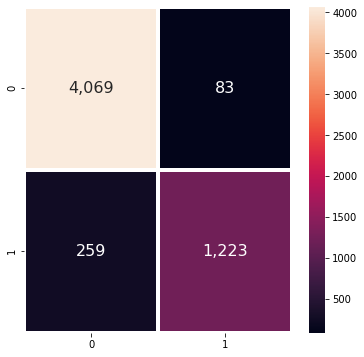

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_train,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})

In [ ]:
accuracy,precision,recall=model_validation_metrics(cm_train)
print(accuracy,precision,recall)

0.939297124600639 0.9364471669218989 0.8252361673414305


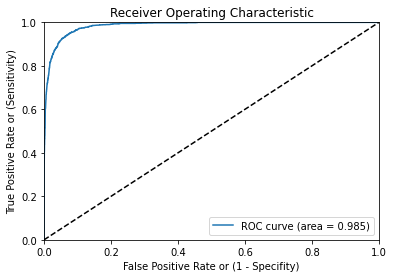

In [ ]:
roc_curve_func(y_train,y_train_pred_proba)

### Cross-Validation

In [ ]:
y_train_pred=model_churn.predict(X_train)
y_test_pred=model_churn.predict(X_test)

In [ ]:
cm_train=confusion_matrix(y_train, y_train_pred)
cm_test=confusion_matrix(y_test, y_test_pred)

In [ ]:
def basic_eval(tm,cm):
  plt.figure(figsize=(6,6))
  plt.title(tm+" Evaluation")
  sns.heatmap(cm,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})
  accuracy,precision,recall=model_validation_metrics(cm)
  print("accuracy :",accuracy)
  print("precision :",precision)
  print("recall :",recall)

accuracy : 0.939297124600639
precision : 0.9364471669218989
recall : 0.8252361673414305


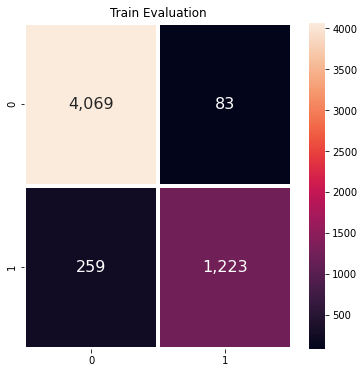

In [ ]:
basic_eval('Train',cm_train)

accuracy : 0.7785663591199432
precision : 0.6190476190476191
recall : 0.5038759689922481


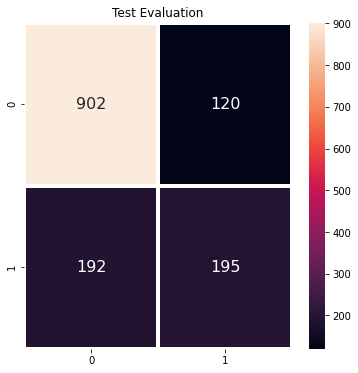

In [ ]:
basic_eval('Test',cm_test)

### Bias-variance trade-off

In [ ]:
## Check on hyperparameter changing
hyper_param_list=[2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
df_trade_off=[]
for md in hyper_param_list:
  model_churn_trade_off=RandomForestClassifier(n_estimators=10, max_depth=md, min_samples_split=3)

  # model_base=RandomForestClassifier(n_estimators=40, max_depth=md,min_samples_split=3)
  # model_churn_trade_off=AdaBoostClassifier(base_estimator=model_base, n_estimators=15, learning_rate=0.2, random_state=321)  

  model_churn_trade_off.fit(X_train,y_train)
  y_train_pred_temp=model_churn_trade_off.predict(X_train)
  y_test_pred_temp=model_churn_trade_off.predict(X_test)
  cm_train=confusion_matrix(y_train, y_train_pred_temp)
  cm_test=confusion_matrix(y_test, y_test_pred_temp)
  acc_train,p,r=model_validation_metrics(cm_train)
  acc_test,p,r =model_validation_metrics(cm_test)
  df_trade_off.append([acc_train,acc_test])
df_trade_off=pd.DataFrame(df_trade_off,columns=['train_accuracy','test_accuracy'],index=hyper_param_list)

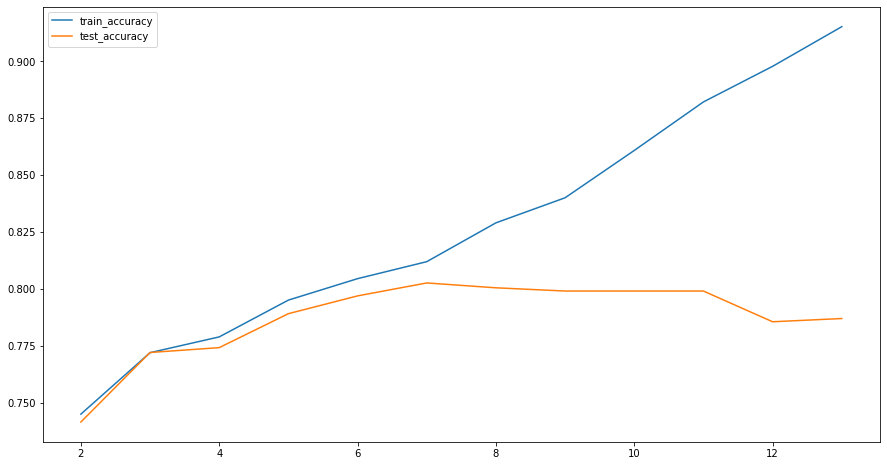

In [ ]:
df_trade_off.plot(figsize=(15,8))

## Model Selection

### Grid Search

In [ ]:
parameters = {'n_estimators':[10,20,30,40],'max_depth':[5,6,7,8,9,10], 'min_samples_split':[3,5,7,9,11],'max_leaf_nodes':[8,12,16,20]}
model_base=RandomForestClassifier(n_estimators=10, max_depth=md,min_samples_split=3,min_samples_leaf=2,max_leaf_nodes=4)
clf_search1 = GridSearchCV(model_base, parameters, cv=5,verbose=1)

In [ ]:
L0=time.time()
clf_search1.fit(X_train,y_train)
print(time.time()-L0)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


227.41548109054565


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  3.8min finished


In [ ]:
# clf.cv_results_
clf_search1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_search1.best_score_

0.7896704654523791

### Random Search

In [ ]:
parameters = {'n_estimators':[10,20,30,40],'max_depth':[5,6,7,8,9,10], 'min_samples_split':[3,5,7,9,11],'max_leaf_nodes':[8,12,16,20]}
model_base=RandomForestClassifier(n_estimators=10, max_depth=md,min_samples_split=3,min_samples_leaf=2,max_leaf_nodes=4)
clf_search2 = RandomizedSearchCV(model_base, param_distributions=parameters, n_iter=60, cv=5,verbose=1)


In [ ]:
L0=time.time()
clf_search2.fit(X_train,y_train)
print(time.time()-L0)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


30.048986673355103


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   30.0s finished


In [ ]:
# clf.cv_results_
clf_search2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_search2.best_score_

0.7873632980877887

### Select the model

In [ ]:
model_churn=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# model_churn=AdaBoostClassifier(base_estimator=model_base, n_estimators=50, learning_rate=0.75, random_state=321)

In [ ]:
model_churn.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred=model_churn.predict(X_train)
y_test_pred=model_churn.predict(X_test)

cm_train=confusion_matrix(y_train, y_train_pred)
cm_test=confusion_matrix(y_test, y_test_pred)

accuracy : 0.7907348242811502
precision : 0.7231222385861561
recall : 0.33130904183535764


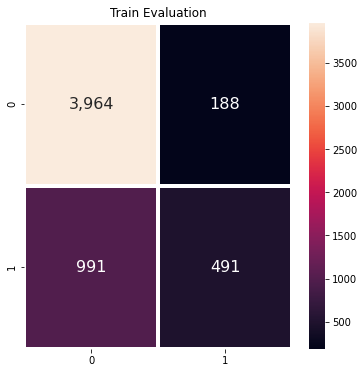

In [ ]:
basic_eval('Train',cm_train)

accuracy : 0.7792760823278921
precision : 0.7159090909090909
recall : 0.32558139534883723


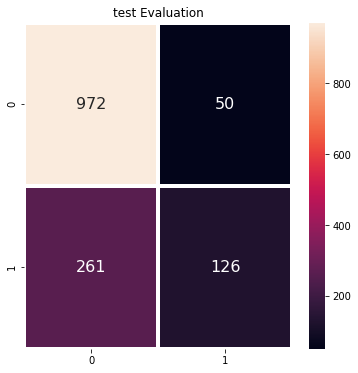

In [ ]:
basic_eval('test',cm_test)

In [ ]:
model_churn

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Best Features

In [ ]:
col_used

['MonthlyCharges_SS',
 'Partner_No',
 'Partner_Yes',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'TotalCharges_SS',
 'log_TotalCharges']

In [ ]:
model_churn.feature_importances_

array([0.39704598, 0.02069675, 0.01531085, 0.04077927, 0.03047392,
       0.23069891, 0.26499432])

In [ ]:
df_imp = pd.DataFrame({'cols':col_used,'importance':model_churn.feature_importances_})
df_imp = df_imp.set_index('cols')

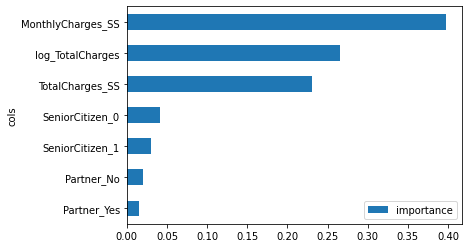

In [ ]:
df_imp.sort_values('importance').plot(kind = 'barh')

## Save and load Model

In [ ]:
joblib.dump(model_churn,'sample_data/churn_v1.pkl')

['sample_data/churn_v1.pkl']

In [ ]:
model_churn_load = joblib.load('sample_data/churn_v1.pkl')
model_standrd_scaler= joblib.load('sample_data/standardS_churnv1.pkl')

In [ ]:
unit_data = X_test.sample()
model_churn_load.predict(unit_data)

array([0])

In [ ]:
unit_data

,MonthlyCharges_SS,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,TotalCharges_SS,log_TotalCharges
3642,1.307446,1.0,0.0,0.0,1.0,0.370482,8.045941


In [ ]:
# 100- mean?

In [ ]:
model_churn_load

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_standrd_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X1 = np.array([1,2,3,1,2,3,1,2,3])
mean_x1 = X1.mean()
std_x1 = X1.std()
mean_x1,std_x1

(2.0, 0.816496580927726)

In [ ]:
(X1-mean_x1)/std_x1

array([-1.22474487,  0.        ,  1.22474487, -1.22474487,  0.        ,
        1.22474487, -1.22474487,  0.        ,  1.22474487])